# Bjet Classification using TensorFlow
Markus Hofer

As Overfitting and Hyperparameters are discussed next week, this implementation is only very basics, however it should give the reader an idea of how to implement simple NN in Tensorflow for binary classification. 

## Setup 

In [1]:
# import libaries 
import numpy as np 
import matplotlib.pyplot as plt 
import tensorflow as tf
import pandas as pd 
import optuna as opt 
import sklearn as sk
import seaborn as sns

In [2]:
# load data and select correct columns
data = pd.read_fwf('AlephBtag_MC_small_v2.csv')
features = ["prob_b", "spheri", "pt2rel", "multip", "bqvjet", "ptlrel"] # only the same as nn1990 

X = data[features]
y = data["isb"]

In [3]:
# Preprocess and split data
transformer = sk.preprocessing.RobustScaler() # configure the transformation based on the data 
transformer.fit(X) # apply transformationn

X_train, X_test, y_train, y_test = sk.model_selection.train_test_split( X, y,
                                                                       test_size=0.20, 
                                                                       random_state=42) # split into training and testing set

## NN1990

In [4]:
# define and complie model 
m1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape = (6,), activation='relu'), # 10 nodes in a Dense Layer
    tf.keras.layers.Dense(10, activation='relu'),  # 10 nodes in a Dense Layer
    tf.keras.layers.Dense(1, activation='sigmoid')]) # 

m1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
m1.summary() # returns an overview of the NN

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                70        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


In [6]:
m1.fit(X_train, y_train, epochs=5) # training 

Train on 27174 samples
Epoch 1/5
27174/27174 [==============================] - 1s 51us/sample - loss: 0.3711 - accuracy: 0.8481
Epoch 2/5
27174/27174 [==============================] - 1s 40us/sample - loss: 0.2691 - accuracy: 0.8984
Epoch 3/5
27174/27174 [==============================] - 1s 43us/sample - loss: 0.2670 - accuracy: 0.8983
Epoch 4/5
27174/27174 [==============================] - 1s 39us/sample - loss: 0.2658 - accuracy: 0.8984
Epoch 5/5
27174/27174 [==============================] - 1s 40us/sample - loss: 0.2650 - accuracy: 0.8992


In [7]:
pred = m1.predict(X_test) # generate predictions

## Alternative Neural Network 

In [8]:
m2 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, input_shape = (6,), activation='relu'),
    tf.keras.layers.Dense(6, activation='relu'),  
    tf.keras.layers.Dense(3, activation='relu'),  
    tf.keras.layers.Dense(1, activation='sigmoid')])

m2.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

In [9]:
m2.fit(X_train, y_train, epochs=5)

Train on 27174 samples
Epoch 1/5
27174/27174 [==============================] - 2s 56us/sample - loss: 0.3673 - accuracy: 0.8391
Epoch 2/5
27174/27174 [==============================] - 1s 43us/sample - loss: 0.2669 - accuracy: 0.8991
Epoch 3/5
27174/27174 [==============================] - 1s 45us/sample - loss: 0.2654 - accuracy: 0.8988
Epoch 4/5
27174/27174 [==============================] - 1s 43us/sample - loss: 0.2654 - accuracy: 0.8986
Epoch 5/5
27174/27174 [==============================] - 1s 50us/sample - loss: 0.2648 - accuracy: 0.8985


In [10]:
pred2 = m2.predict(X_test)

## Displaying ROC curves for the two Models 

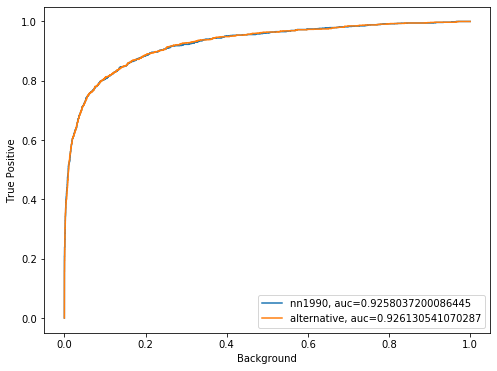

In [11]:
plt.figure(figsize=(8, 6)) 

# calc  and print roc curves for nn1990

fpr_nn, tpr_nn, thresholds_nn  = sk.metrics.roc_curve(y_test,pred )
roc_auc_nn = sk.metrics.auc(fpr_nn, tpr_nn)

plt.plot(fpr_nn,tpr_nn,label="nn1990, auc="+str(roc_auc_nn)) 

# calc  and print roc curves for the alternative NN
fpr_nn, tpr_nn, thresholds_nn  = sk.metrics.roc_curve(y_test,pred2 )
roc_auc_nn = sk.metrics.auc(fpr_nn, tpr_nn)

plt.plot(fpr_nn,tpr_nn,label="alternative, auc="+str(roc_auc_nn))

plt.xlabel("Background")
plt.ylabel("True Positive")
plt.legend();